---
title: 03 - human analysis
author: Martin Proks
date: 26-08-2023
---

In [1]:
!which pip

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/bin/pip


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import scvi
import scanpy as sc
import scanpy.external as sce
import scFates as scf
import matplotlib.pyplot as plt

import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=UserWarning)

/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/projects/dan1/data/Brickman/conda/envs/scvi-1.0.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# adata = sc.read("../results/human_integration/version_1/scvi/adata.h5ad")
adata = sc.read("../results/02_human_integration/scvi/adata.h5ad")
adata

AnnData object with n_obs × n_vars = 2323 × 3000
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', '_scvi_batch', '_scvi_labels'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg'
    obsm: 'X_mde_scVI', 'X_scVI'
    layers: 'counts', 'scVI_normalized'

In [4]:
# adata.obs.experiment = adata.obs.experiment.str.replace('_', ' et al., ').astype('category')
# adata.obs['batch'] = adata.obs._scvi_batch

# adata.obs['stage'] = adata.obs.ct.cat.rename_categories({
#     'Epiblast': 'EPI',
#     'Inner Cell Mass': 'ICM',
#     'Primitive Endoderm': 'PrE',
#     'Trophectoderm': 'TE'
# }).cat.reorder_categories(['Oocyte', 'Pronucleus', 'Zygote', '2C', '4C', '8C', 'Morula', 'TE', 'ICM', 'EPI', 'PrE', 'Unknown'])

# adata.obs['timepoint'] = adata.obs.ct.astype(str)
# timepoint_mask = adata.obs.ct.isin(['Unknown', 'Trophectoderm', 'Inner Cell Mass', 'Primitive Endoderm', 'Epiblast'])
# adata.obs.loc[timepoint_mask, 'timepoint'] = 'E' + adata.obs.loc[timepoint_mask, 'day'].astype(str)
# adata.obs.ct = adata.obs.ct.astype('category')

In [5]:
# adata.obs['ct_orig'] = adata.obs.ct
# adata.obs.ct = adata.obs.ct_fine

In [6]:
# ENSG_to_SYMBOL = pd.read_csv('../data/external/human/Homo_sapiens.GRCh38.110.ENSG_to_SYMBOL.tsv', delimiter=" ", header=None)
# ENSG_to_SYMBOL.columns = ['ensembl','symbol']
# ENSG_to_SYMBOL_noName = pd.read_csv('../data/external/human/Homo_sapiens.GRCh38.110.ENSG_to_SYMBOL_noName.tsv', delimiter=" ", header=None)
# nameless_df = pd.DataFrame(
#     data = {
#         'ensembl' : list(set(ENSG_to_SYMBOL_noName[0].tolist()) - set(ENSG_to_SYMBOL.ensembl.tolist())),
#         'symbol' : list(set(ENSG_to_SYMBOL_noName[0].tolist()) - set(ENSG_to_SYMBOL.ensembl.tolist())),
#     })
# ENSG_to_SYMBOL = pd.concat([ENSG_to_SYMBOL, nameless_df])
# ENSG_to_SYMBOL.set_index('ensembl', inplace=True)

In [7]:
# adata.var['symbol'] = ENSG_to_SYMBOL.loc[adata.var_names, 'symbol']

## 1. SCVI

In [9]:
USE_REP = 'X_scVI'

In [10]:
# Ideally find 15 clusters

sc.pp.neighbors(adata, use_rep=USE_REP)
sc.tl.leiden(adata, resolution=0.8)

2023-12-05 20:08:39.657755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


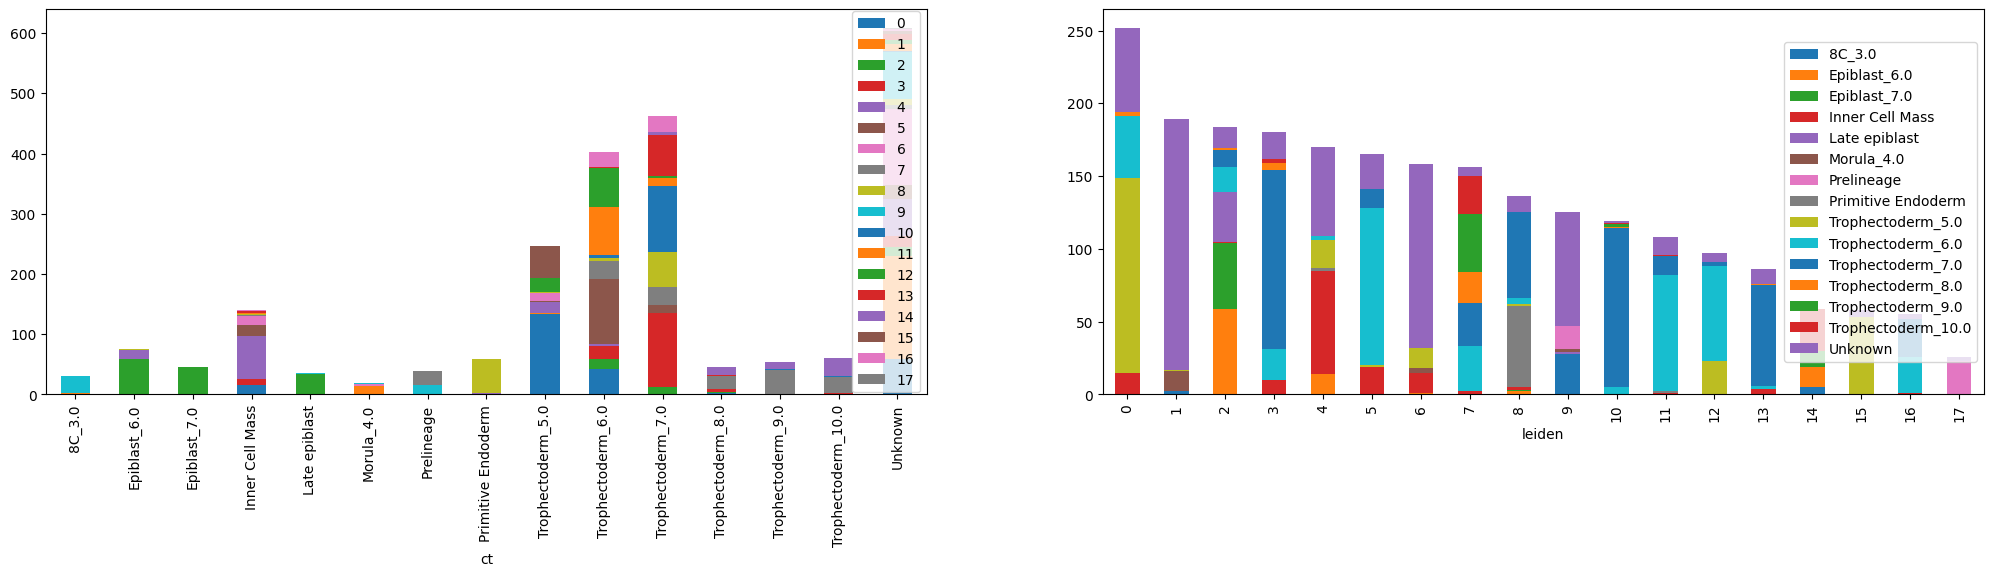

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[25, 5])
adata.obs.groupby(['ct', 'leiden']).size().unstack().plot(kind='bar', stacked=True, ax=ax[0]).legend(loc='right')
adata.obs.groupby(['leiden', 'ct']).size().unstack().plot(kind='bar', stacked=True, ax=ax[1]).legend(loc='right')

### 1.0. PCA

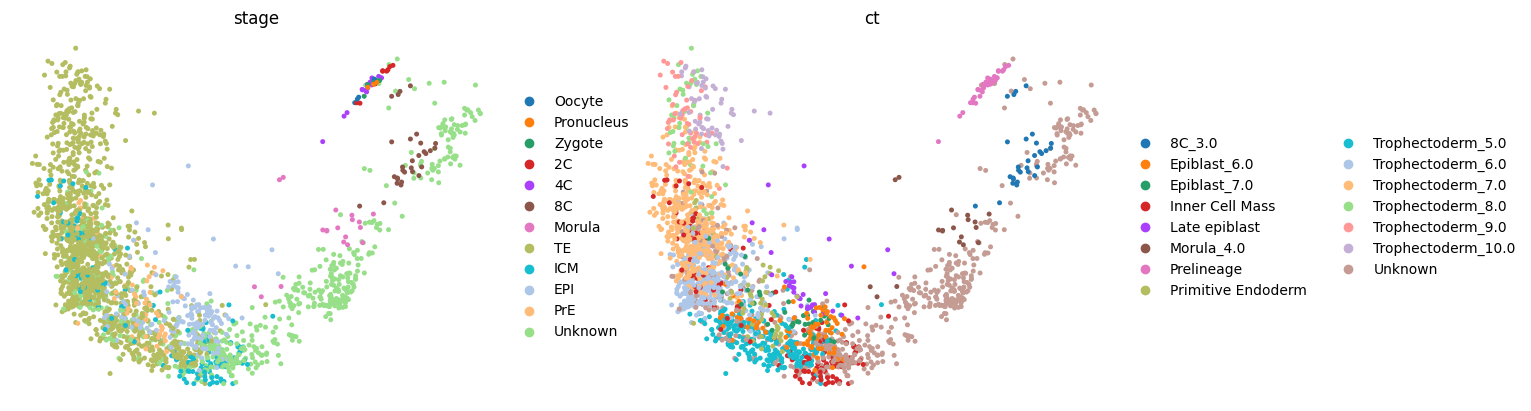

In [12]:
sc.tl.pca(adata)
sc.pl.pca(adata, color=['stage', 'ct'], frameon=False, ncols=2)

### 1.1. UMAP

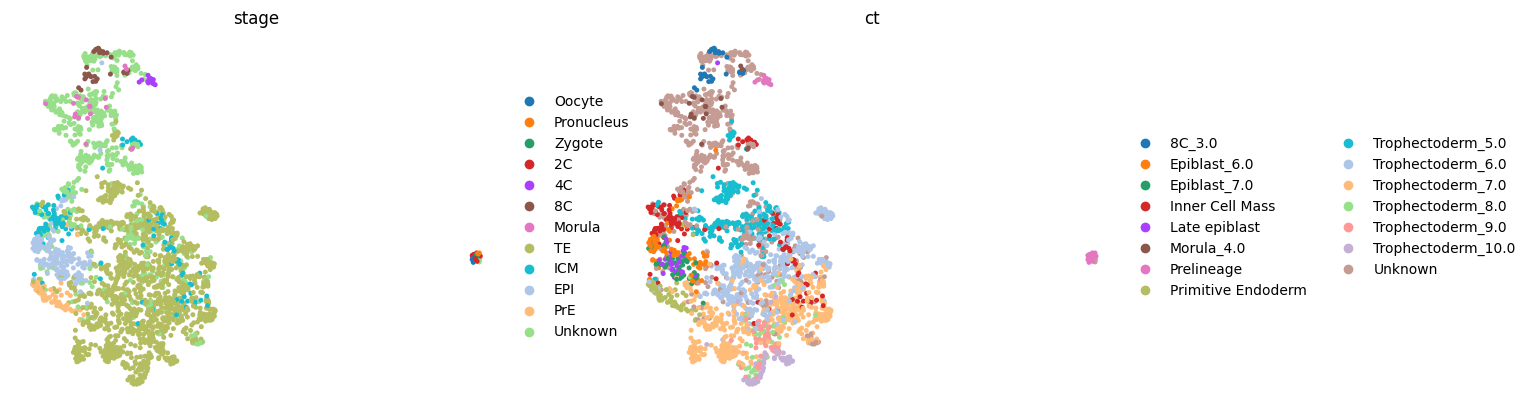

In [13]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['stage', 'ct'], frameon=False, ncols=2)

### 1.2. Phate

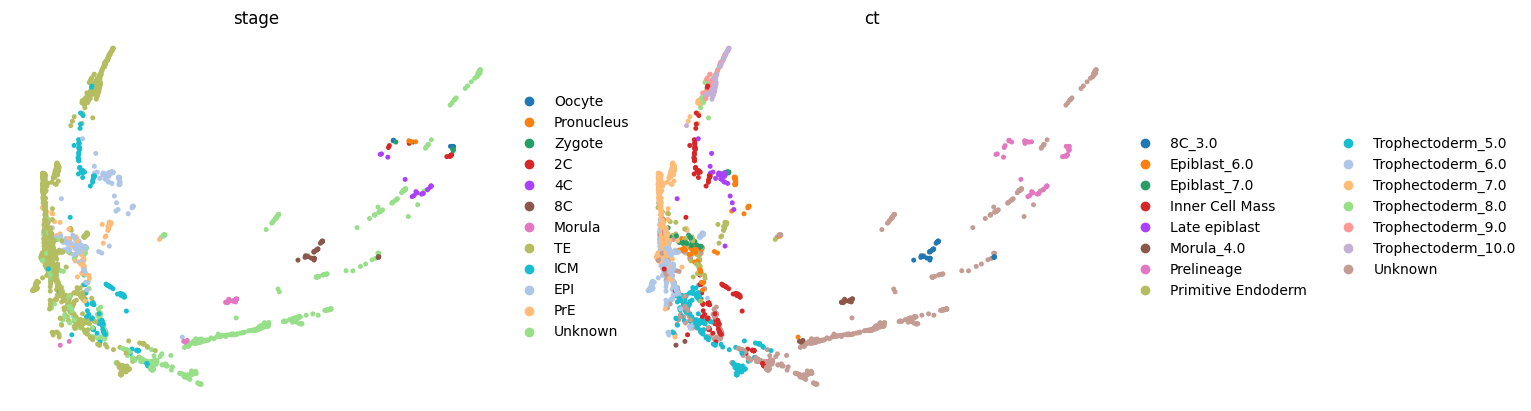

In [14]:
sce.tl.phate(adata, n_jobs=8)
sce.pl.phate(adata, color=['stage', 'ct'], frameon=False, ncols=2)

### 1.3. t-SNE

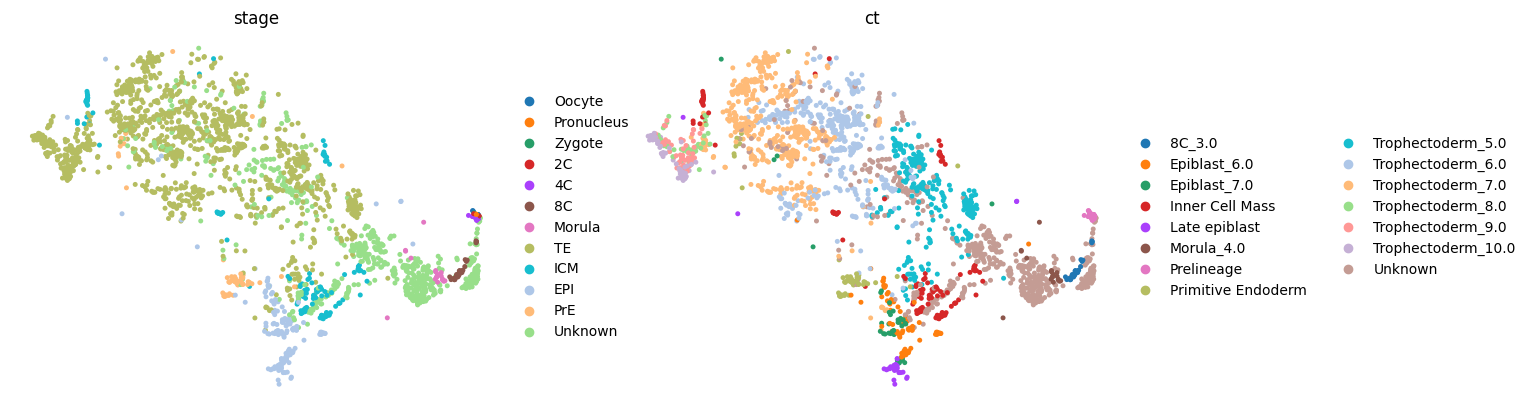

In [15]:
sc.tl.tsne(adata, n_jobs=8, perplexity=300)
sc.pl.tsne(adata, color=['stage', 'ct'], frameon=False, ncols=2)

### 1.4. Force Directed Graph

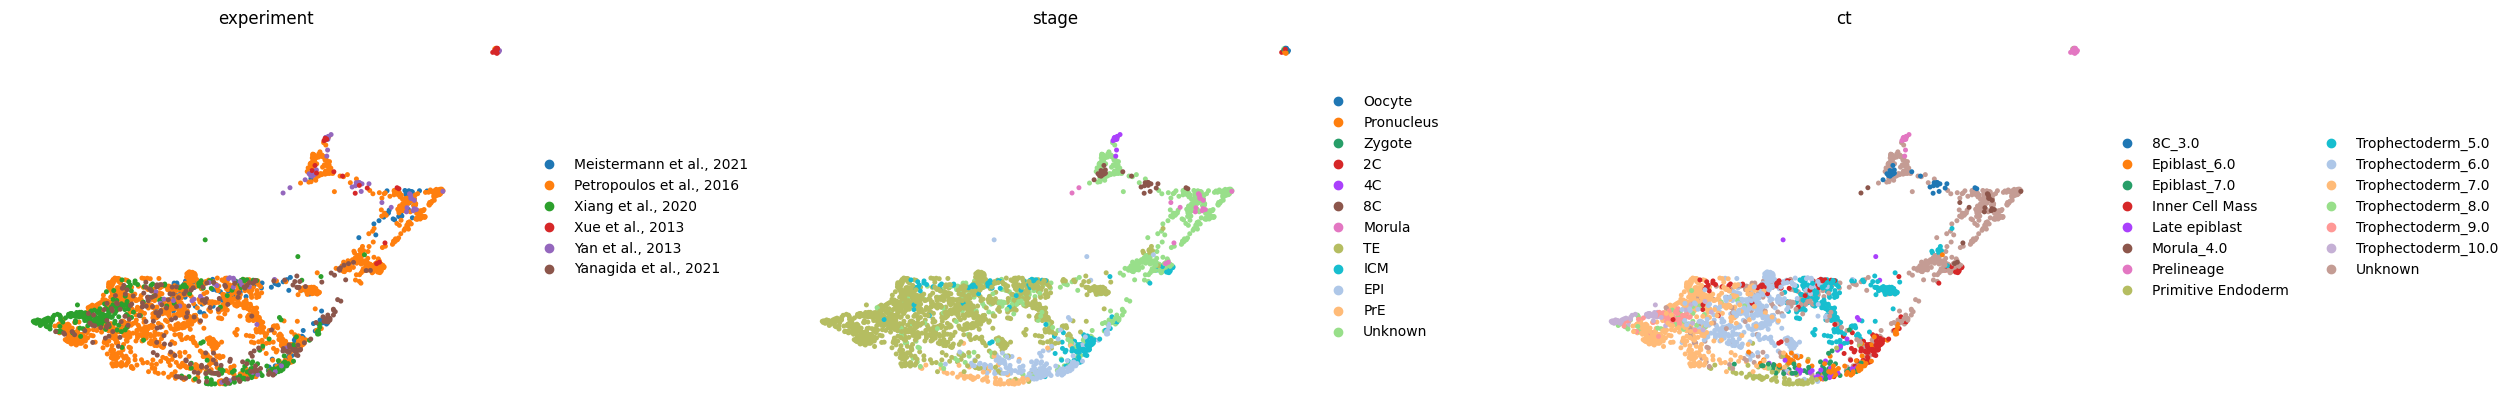

In [17]:
sc.tl.draw_graph(adata, n_jobs=8, random_state=9)
sc.pl.draw_graph(adata, color=['experiment', 'stage', 'ct'], frameon=False, ncols=3, wspace=0.4)

### 1.5. DC

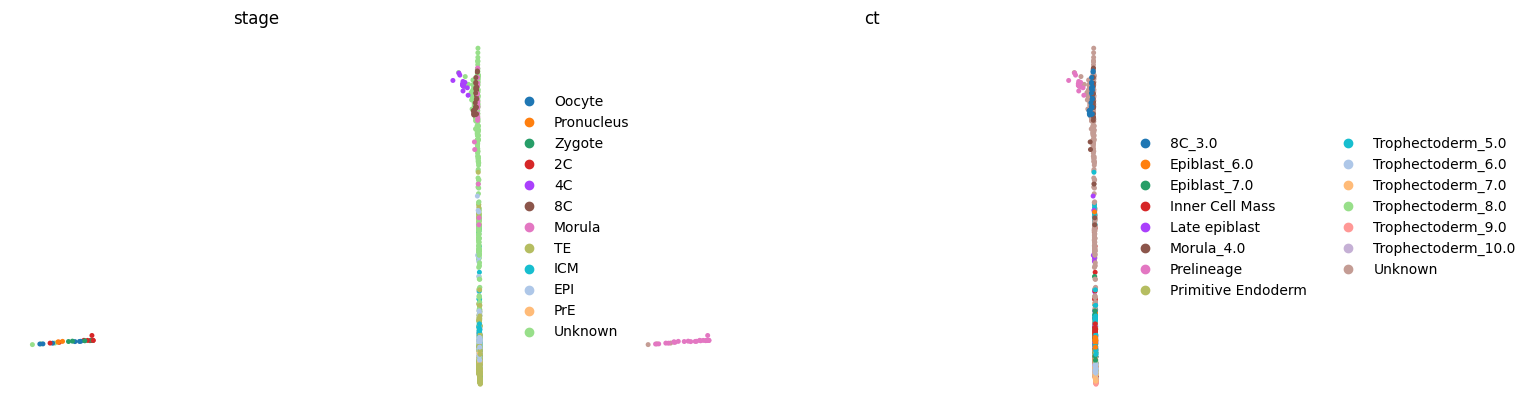

In [18]:
# Bug: https://github.com/scverse/scanpy/issues/2254
sc.tl.diffmap(adata)

adata.obsm["X_diffmap_"] = adata.obsm["X_diffmap"][:, 1:] 
sc.pl.embedding(adata, "diffmap_", color=['stage', 'ct'], frameon=False, ncols=2)

## 2. Pseudotime

In [19]:
adata

AnnData object with n_obs × n_vars = 2323 × 3000
    obs: 'day', 'ct', 'experiment', 'technology', 'n_counts', 'n_genes', 'ct_fine', 'batch', 'stage', 'timepoint', 'ct_orig', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'leiden', 'pca', 'stage_colors', 'ct_colors', 'umap', 'tsne', 'draw_graph', 'experiment_colors', 'diffmap_evals'
    obsm: 'X_mde_scVI', 'X_scVI', 'X_pca', 'X_umap', 'X_phate', 'X_tsne', 'X_draw_graph_fa', 'X_diffmap', 'X_diffmap_'
    varm: 'PCs'
    layers: 'counts', 'scVI_normalized'
    obsp: 'distances', 'connectivities'

### 2.1. DPT package

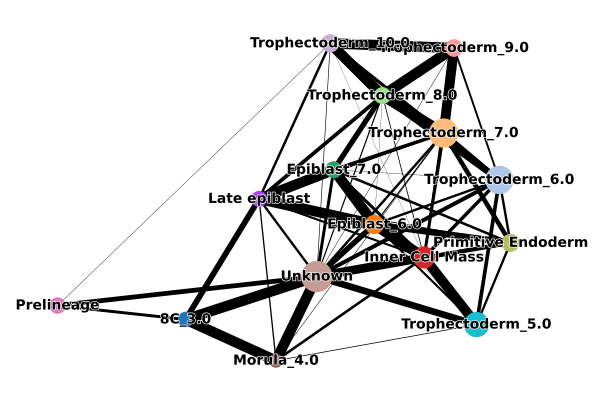

In [20]:
sc.pp.neighbors(adata, use_rep=USE_REP)
sc.tl.diffmap(adata)

sc.tl.paga(adata, groups='ct')
sc.pl.paga(adata, color=['ct'], frameon=False, fontoutline=True)
sc.tl.draw_graph(adata, init_pos='paga', n_jobs=10)

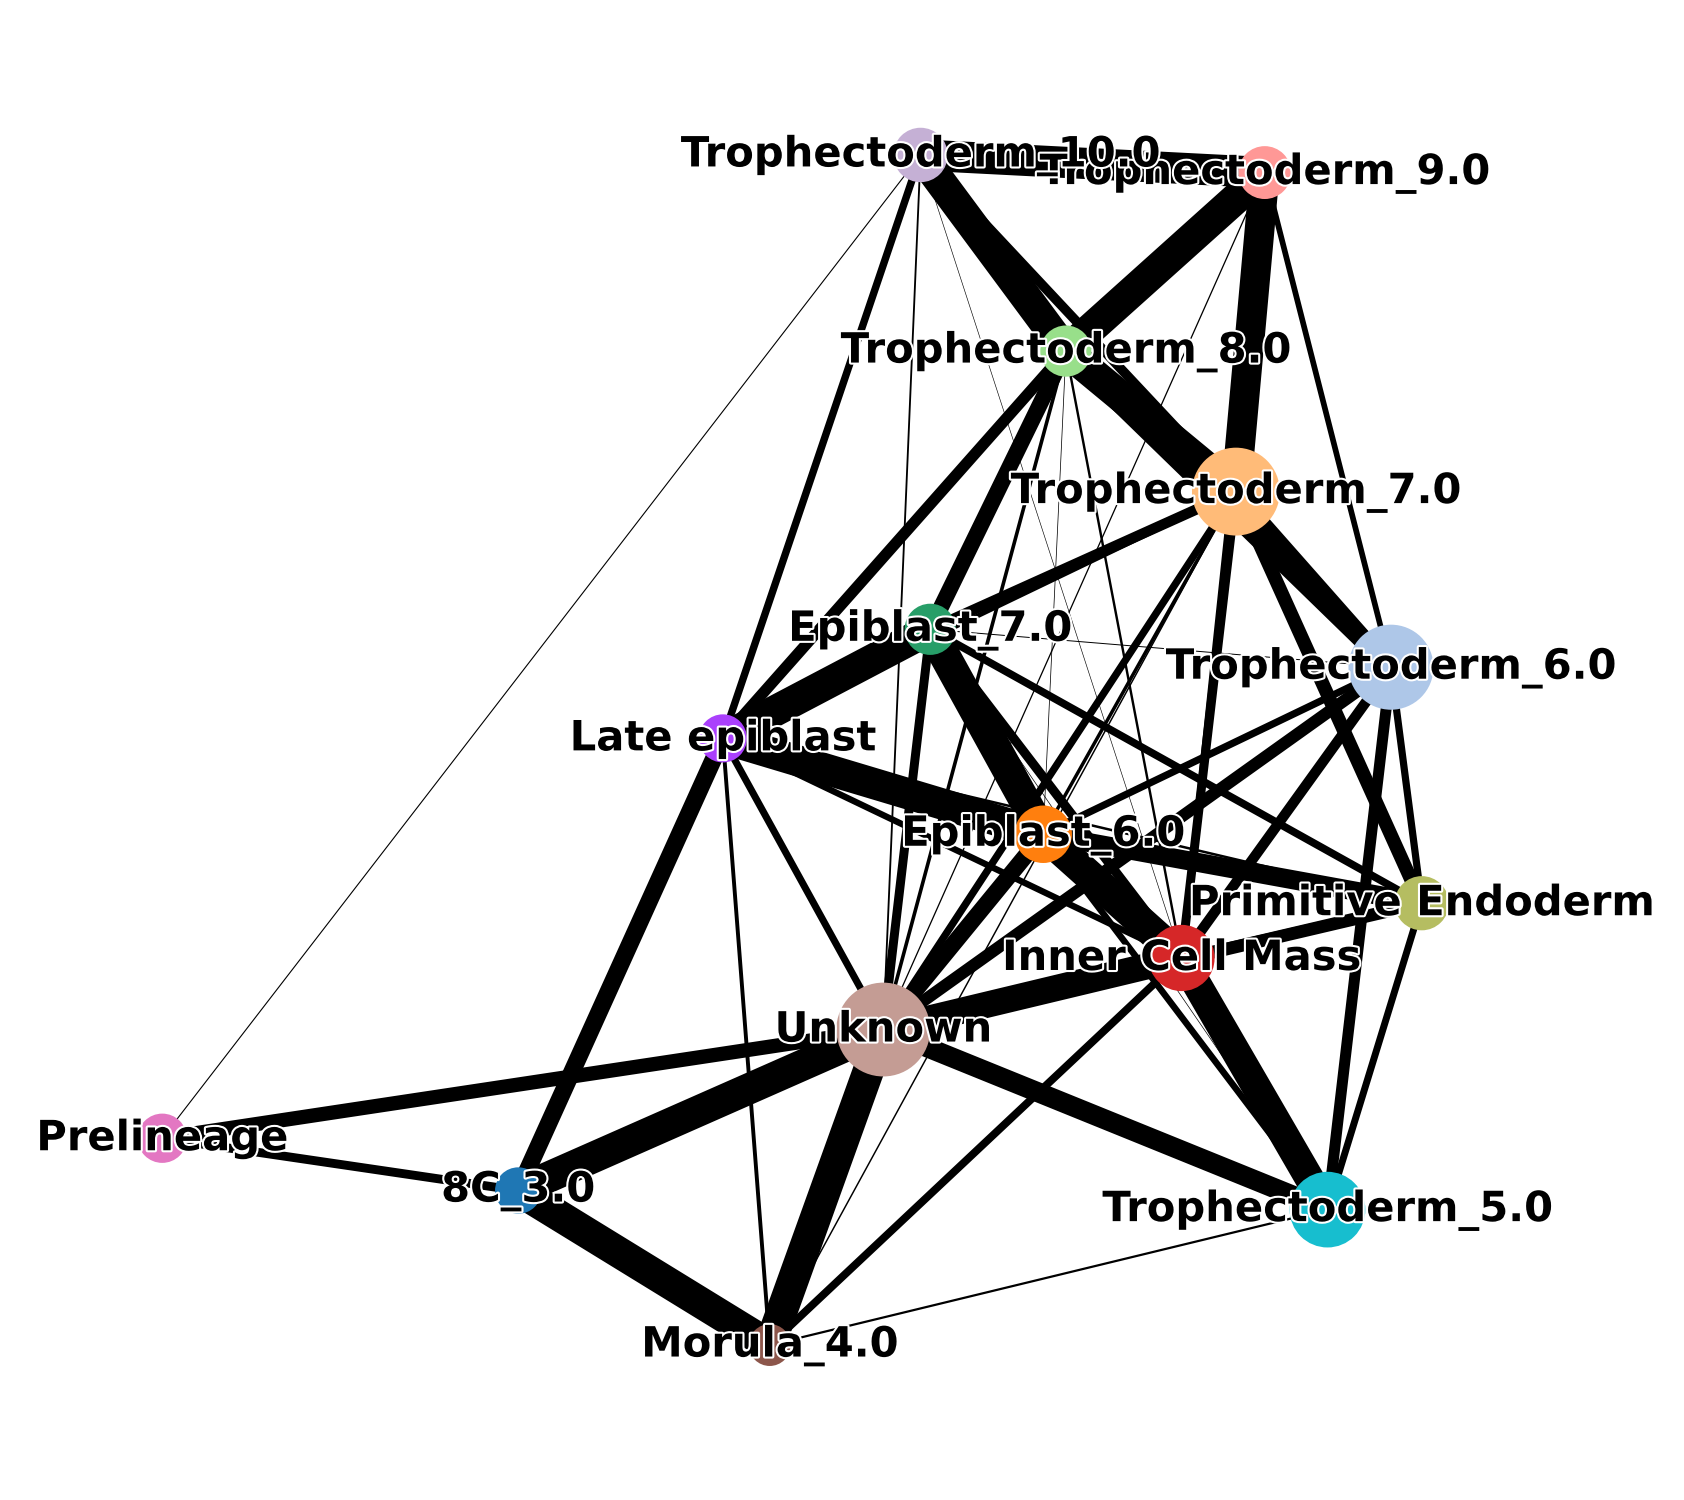

In [21]:
with plt.rc_context({"figure.figsize": (6, 6), "figure.dpi": (300)}):
    sc.pl.paga(adata, color=['ct'], frameon=False, fontoutline=True)

In [24]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['ct']  == 'Prelineage')[0]
# adata.uns['iroot'] = np.where(adata.obs_names == 'SRX144343_SRX144343')[0][0]
sc.tl.dpt(adata)

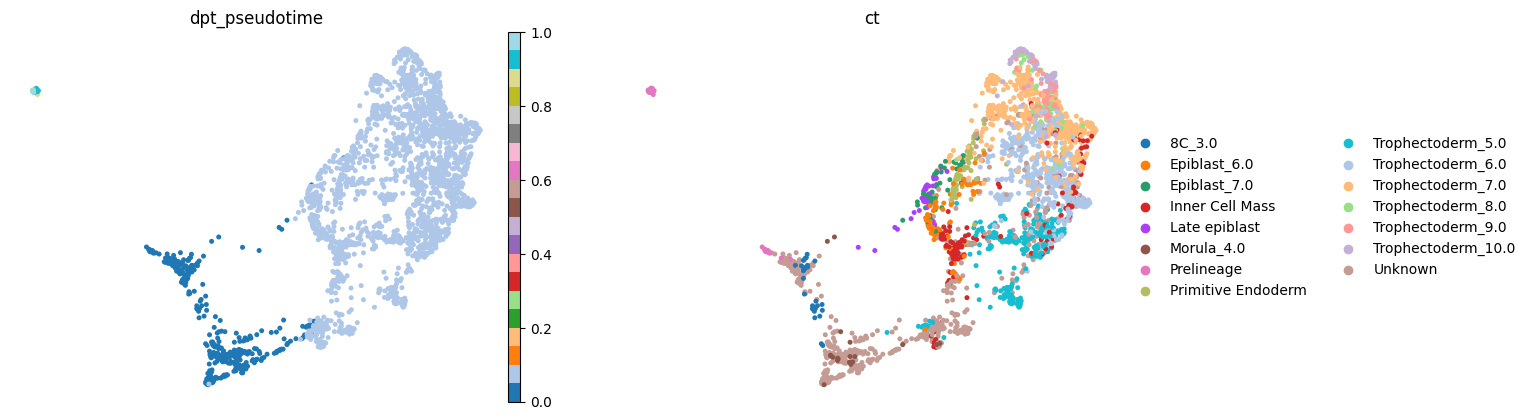

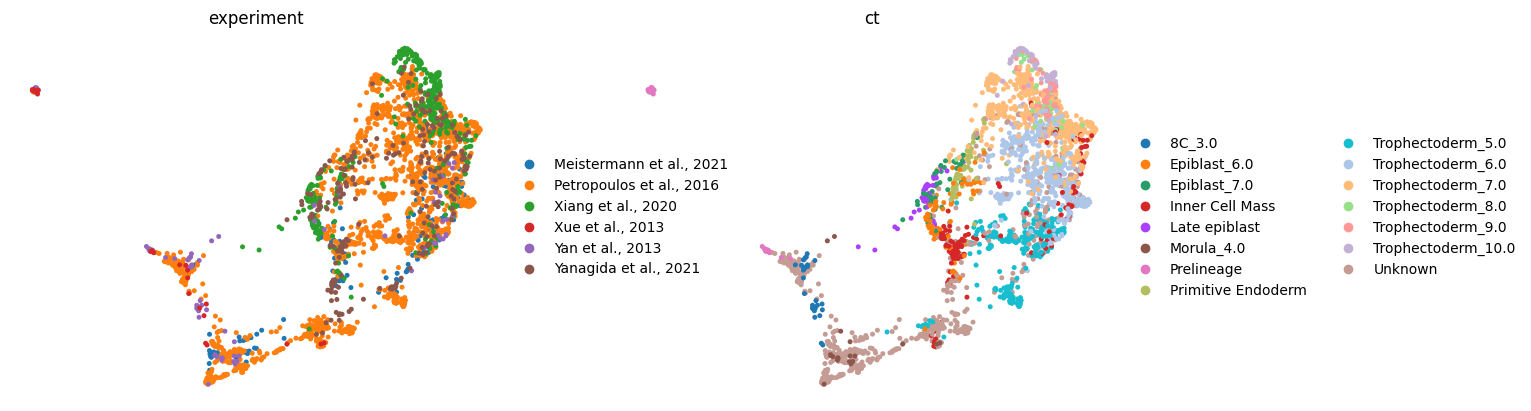

In [25]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime', 'ct'], frameon=False, ncols=2, cmap='tab20')
sc.pl.draw_graph(adata, color=['experiment', 'ct'], frameon=False, ncols=2, cmap='tab20')

### 2.2. scFATEs

In [26]:
sc.pp.neighbors(adata, use_rep=USE_REP)
sc.tl.draw_graph(adata, n_jobs=10, random_state=9)

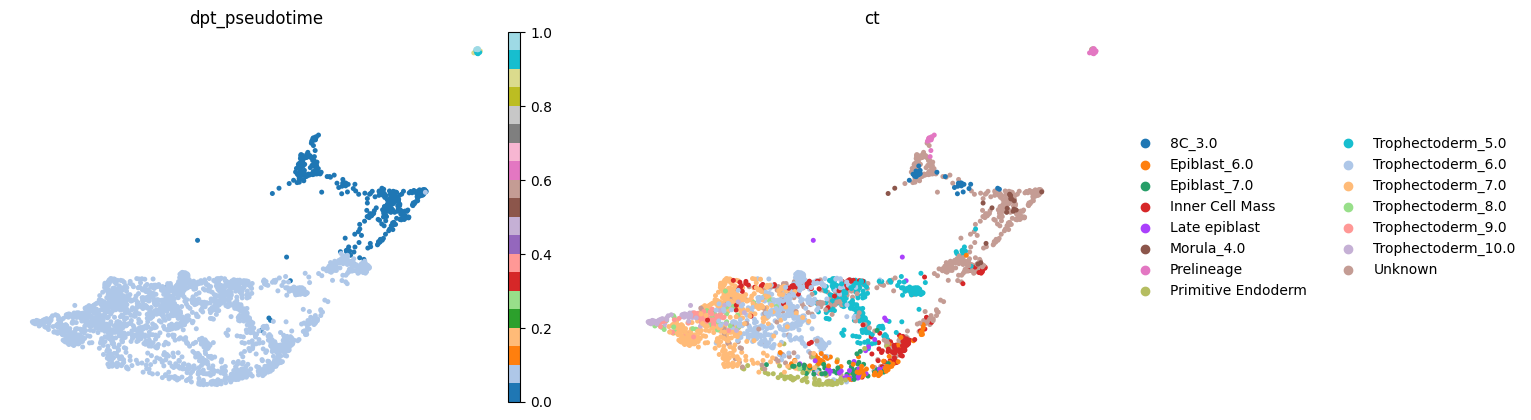

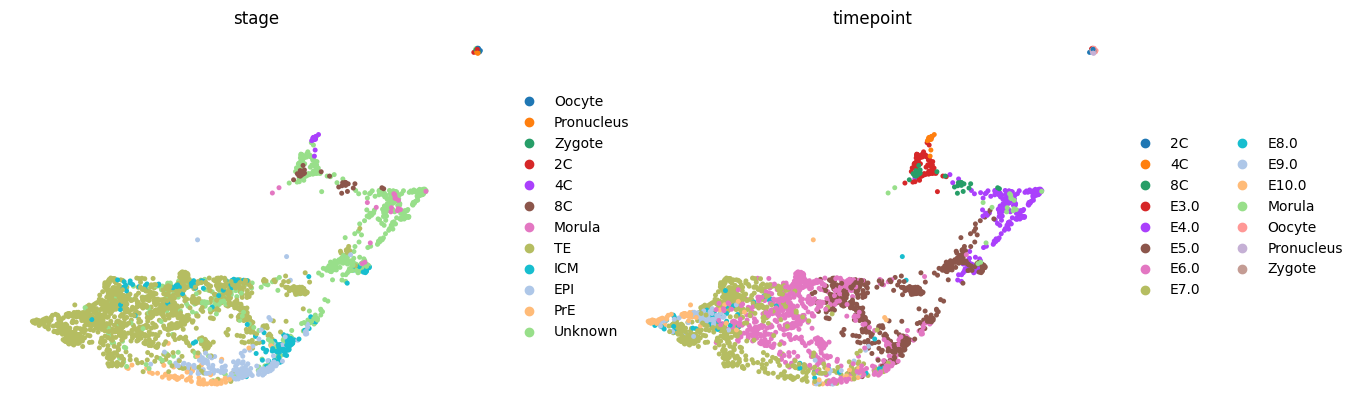

In [27]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime', 'ct'], frameon=False, ncols=2, cmap='tab20')
sc.pl.draw_graph(adata, color=['stage', 'timepoint'], frameon=False, ncols=2, cmap='tab20')

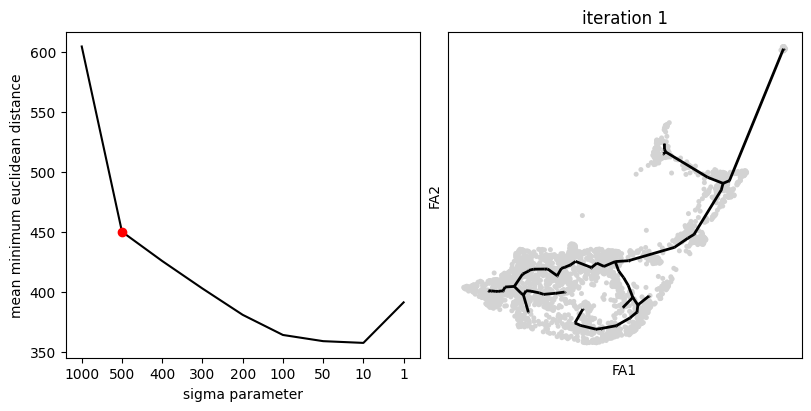

In [36]:
sig = scf.tl.explore_sigma(adata,
                         # Nodes=20,
                         Nodes=60,
                         use_rep="X_draw_graph_fa",
                         sigmas=[1000,500,400,300,200,100,50,10,1],
                         seed=42,plot=True)

In [37]:
scf.tl.tree(adata,
            # Nodes=30,
            Nodes=60,
            use_rep="X_draw_graph_fa",
            method="ppt",
            ppt_nsteps=10,
            ppt_sigma=sig,
            ppt_lambda=100,
            seed=42)

inferring a principal tree --> parameters used 
    60 principal points, sigma = 500, lambda = 100, metric = euclidean
    fitting: 100%|████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 248.42it/s]
    not converged (error: 0.1919399979722125)
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


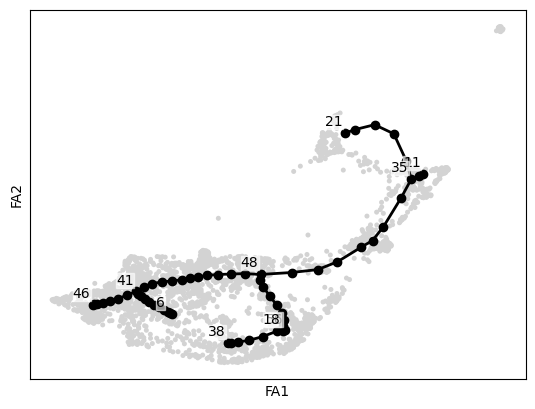

In [38]:
scf.pl.graph(adata)

In [39]:
scf.tl.root(adata, 21)

node 21 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [40]:
scf.tl.pseudotime(adata,n_jobs=10,n_map=10,seed=42)

projecting cells onto the principal graph
    mappings: 100%|████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.43s/it]
    finished (0:00:57) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


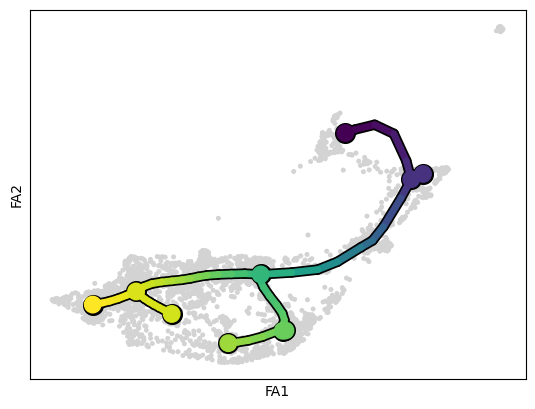

In [41]:
scf.pl.trajectory(adata)

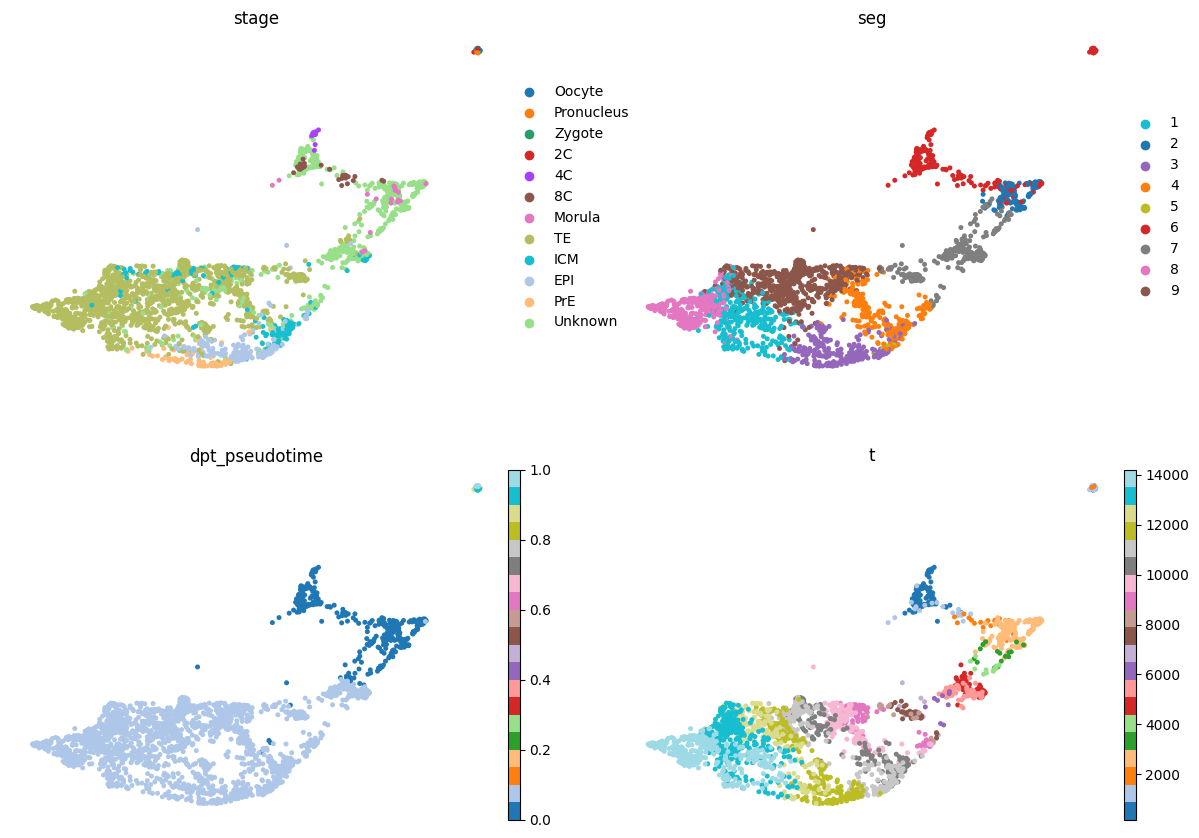

In [42]:
sc.pl.draw_graph(adata, color=['stage', 'seg', 'dpt_pseudotime', 't'], frameon=False, ncols=2, cmap='tab20')

Generating dendrogram of tree
    segment : 100%|██████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.83it/s]
    finished (0:00:02) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


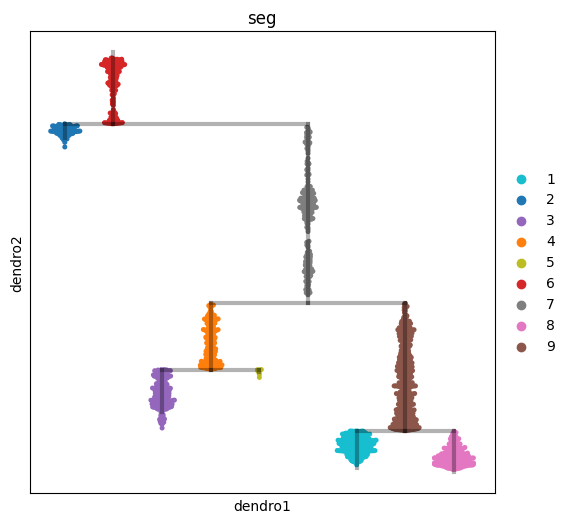

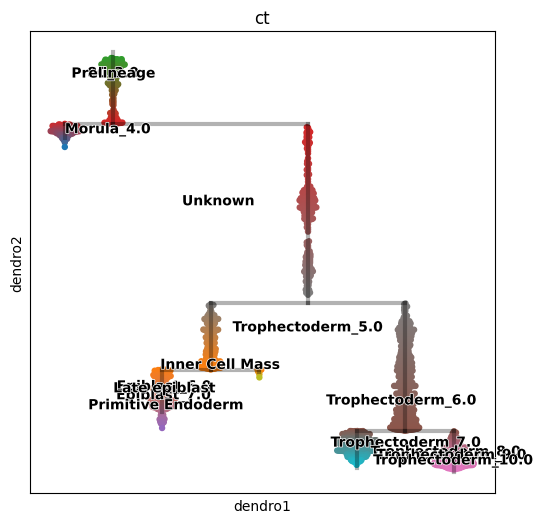

In [43]:
scf.tl.dendrogram(adata, n_jobs=8)
with plt.rc_context({"figure.figsize": (6, 6)}):
    scf.pl.dendrogram(adata,color="seg")
    scf.pl.dendrogram(adata,color="ct",legend_loc="on data",color_milestones=True,legend_fontoutline=True)

### 2.3. Palantir


**NOTE**: doesn't work, skipping

In [ ]:
# import logging
# logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

# sc.pp.neighbors(adata, use_rep="X_scANVI")
# sce.tl.palantir(adata, use_adjacency_matrix=True, distances_key="distances")
# sc.tl.tsne(adata, n_pcs=2, use_rep='X_palantir_multiscale', perplexity=30)

# sc.pl.embedding(adata, basis='X_palantir_multiscale', color=['ct', 'stage'], frameon=False, ncols=2)

## 3. Differentially expressed genes

In [44]:
def filter_markers(df: pd.DataFrame, n_genes: int = 5, upper: bool = False):
    # significant only
    df = df[
        (df["is_de_fdr_0.05"])
        & (df["bayes_factor"] > 3)
        & (df["non_zeros_proportion1"] > 0.1)
        & (df["lfc_median"] > 0)
    ]
    comparisons = df.comparison.unique()

    deg_df = {}
    for comparison in comparisons:
        cluster = comparison.split(" ")[0]
        markers = (
            df.query("comparison == @comparison")
            .sort_values(by="lfc_median", ascending=False)
            .head(n_genes)
        )
        deg_df[cluster] = (
            markers.index.str.upper().tolist() if upper else markers.index.tolist()
        )

    return deg_df

In [49]:
vae = scvi.model.SCVI.load("../results/02_human_integration/scvi/")

INFO     File ../results/02_human_integration/scvi/model.pt already downloaded                                     


In [50]:
m_ct = vae.differential_expression(groupby="ct")
m_ct_filt = filter_markers(m_ct, n_genes=10)

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.07s/it]


In [51]:
pd.DataFrame.from_dict(m_ct_filt, orient='index').transpose()

8C_3.0     Epiblast_6.0     Epiblast_7.0            Inner  \
0  ENSG00000258223  ENSG00000143768  ENSG00000143768  ENSG00000010438   
1  ENSG00000285891  ENSG00000283567  ENSG00000283567  ENSG00000180644   
2  ENSG00000243073  ENSG00000146250  ENSG00000189184  ENSG00000166523   
3  ENSG00000254659  ENSG00000283405  ENSG00000146250  ENSG00000164530   
4  ENSG00000274764  ENSG00000102854  ENSG00000178860  ENSG00000136869   
5  ENSG00000213921  ENSG00000181234  ENSG00000102854  ENSG00000289643   
6  ENSG00000272382  ENSG00000189184  ENSG00000243232  ENSG00000179934   
7  ENSG00000226185  ENSG00000166523  ENSG00000174807  ENSG00000125845   
8  ENSG00000277058  ENSG00000118785  ENSG00000133083  ENSG00000167755   
9  ENSG00000204501  ENSG00000134817  ENSG00000118785  ENSG00000133937   

              Late       Morula_4.0       Prelineage        Primitive  \
0  ENSG00000162344  ENSG00000285891  ENSG00000254659  ENSG00000259974   
1  ENSG00000136999  ENSG00000274764  ENSG00000285010  ENSG00000162998   
2  ENSG00000283567  ENSG00000178928  ENSG00000288545  ENSG00000167434   
3  ENSG00000198576  ENSG00000257951  ENSG00000146678  ENSG00000171557   
4  ENSG00000145423  ENSG00000258873  ENSG00000149507  ENSG00000125798   
5  ENSG00000178860  ENSG00000204501  ENSG00000253585  ENSG00000229214   
6  ENSG00000106341  ENSG00000287512  ENSG00000237469  ENSG00000125848   
7  ENSG00000174807  ENSG00000258223  ENSG00000205126  ENSG00000164736   
8  ENSG00000067840  ENSG00000239810  ENSG00000132514  ENSG00000243978   
9  ENSG00000133083  ENSG00000277058  ENSG00000172680  ENSG00000146374   

  Trophectoderm_5.0 Trophectoderm_6.0 Trophectoderm_7.0 Trophectoderm_8.0  \
0   ENSG00000286361   ENSG00000127074   ENSG00000249861   ENSG00000077274   
1   ENSG00000287442   ENSG00000109205   ENSG00000203857   ENSG00000166396   
2   ENSG00000164089   ENSG00000137440   ENSG00000203783   ENSG00000254622   
3   ENSG00000204478   ENSG00000145681   ENSG00000124731   ENSG00000112195   
4   ENSG00000095596   ENSG00000198734   ENSG00000184502   ENSG00000136695   
5   ENSG00000010438   ENSG00000104921   ENSG00000096088   ENSG00000167767   
6   ENSG00000198883   ENSG00000121769   ENSG00000135346   ENSG00000099250   
7   ENSG00000124557   ENSG00000188176   ENSG00000082074   ENSG00000203857   
8   ENSG00000251360   ENSG00000165092   ENSG00000135046   ENSG00000158786   
9   ENSG00000121933   ENSG00000163347   ENSG00000189052   ENSG00000203783   

  Trophectoderm_9.0 Trophectoderm_10.0          Unknown  
0   ENSG00000077274    ENSG00000166396  ENSG00000196289  
1   ENSG00000166396    ENSG00000077274  ENSG00000258223  
2   ENSG00000172927    ENSG00000172927  ENSG00000124557  
3   ENSG00000254622    ENSG00000112195  ENSG00000287442  
4   ENSG00000167767    ENSG00000254622  ENSG00000204479  
5   ENSG00000136695    ENSG00000142623  ENSG00000259009  
6   ENSG00000112195    ENSG00000125084  ENSG00000251360  
7   ENSG00000158786    ENSG00000221826  ENSG00000272382  
8   ENSG00000203857    ENSG00000274286  ENSG00000257951  
9   ENSG00000139209    ENSG00000185112  ENSG00000254659

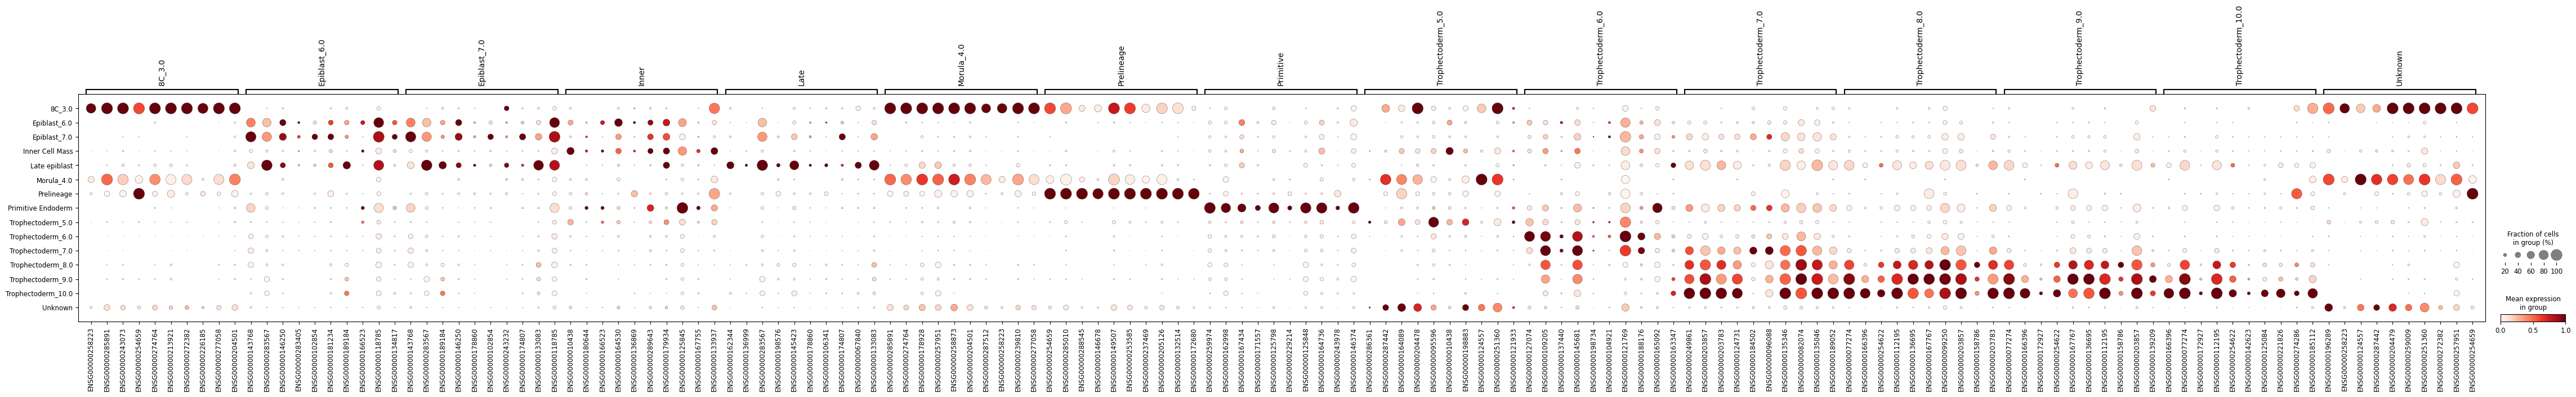

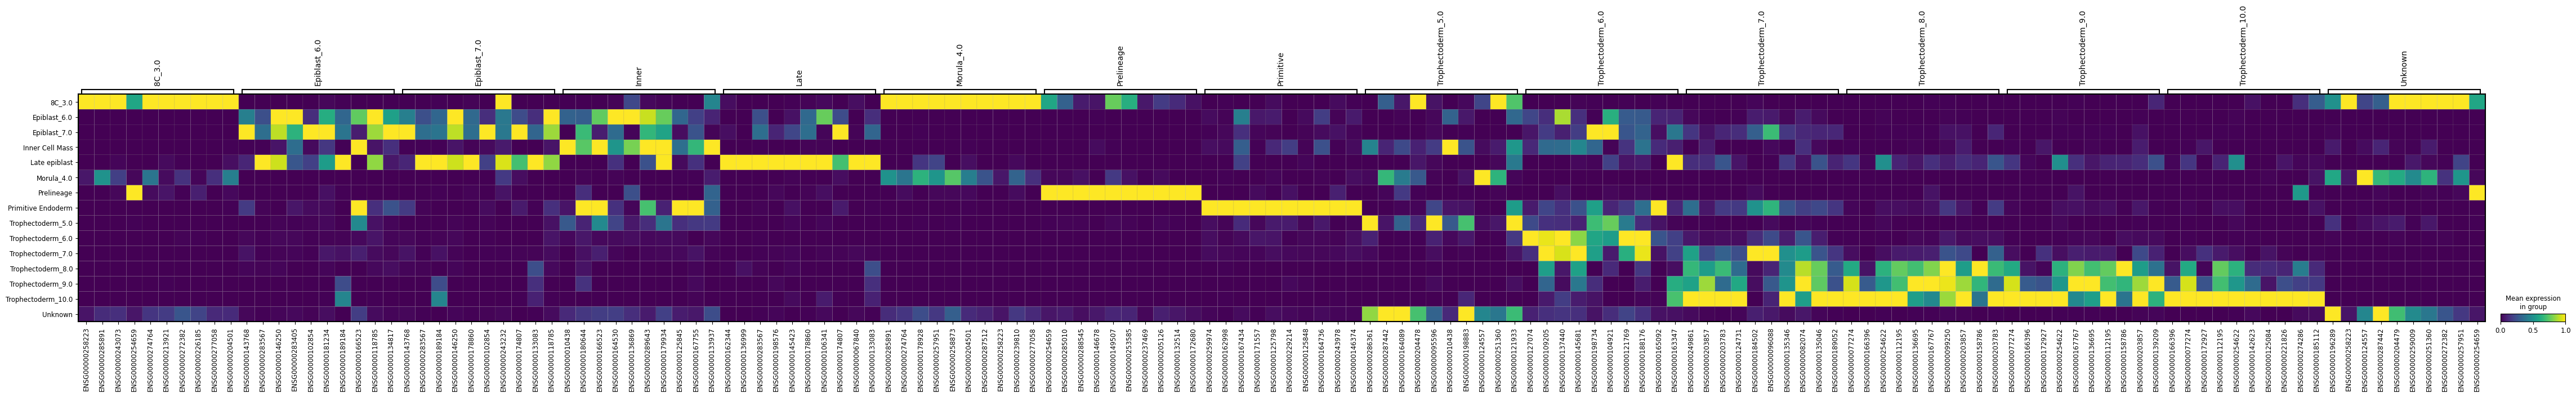

In [54]:
sc.pl.dotplot(adata, m_ct_filt, groupby='ct', dendrogram=False, standard_scale='var')
sc.pl.matrixplot(adata, m_ct_filt, groupby='ct', dendrogram=False, standard_scale='var')

### 4. Markers

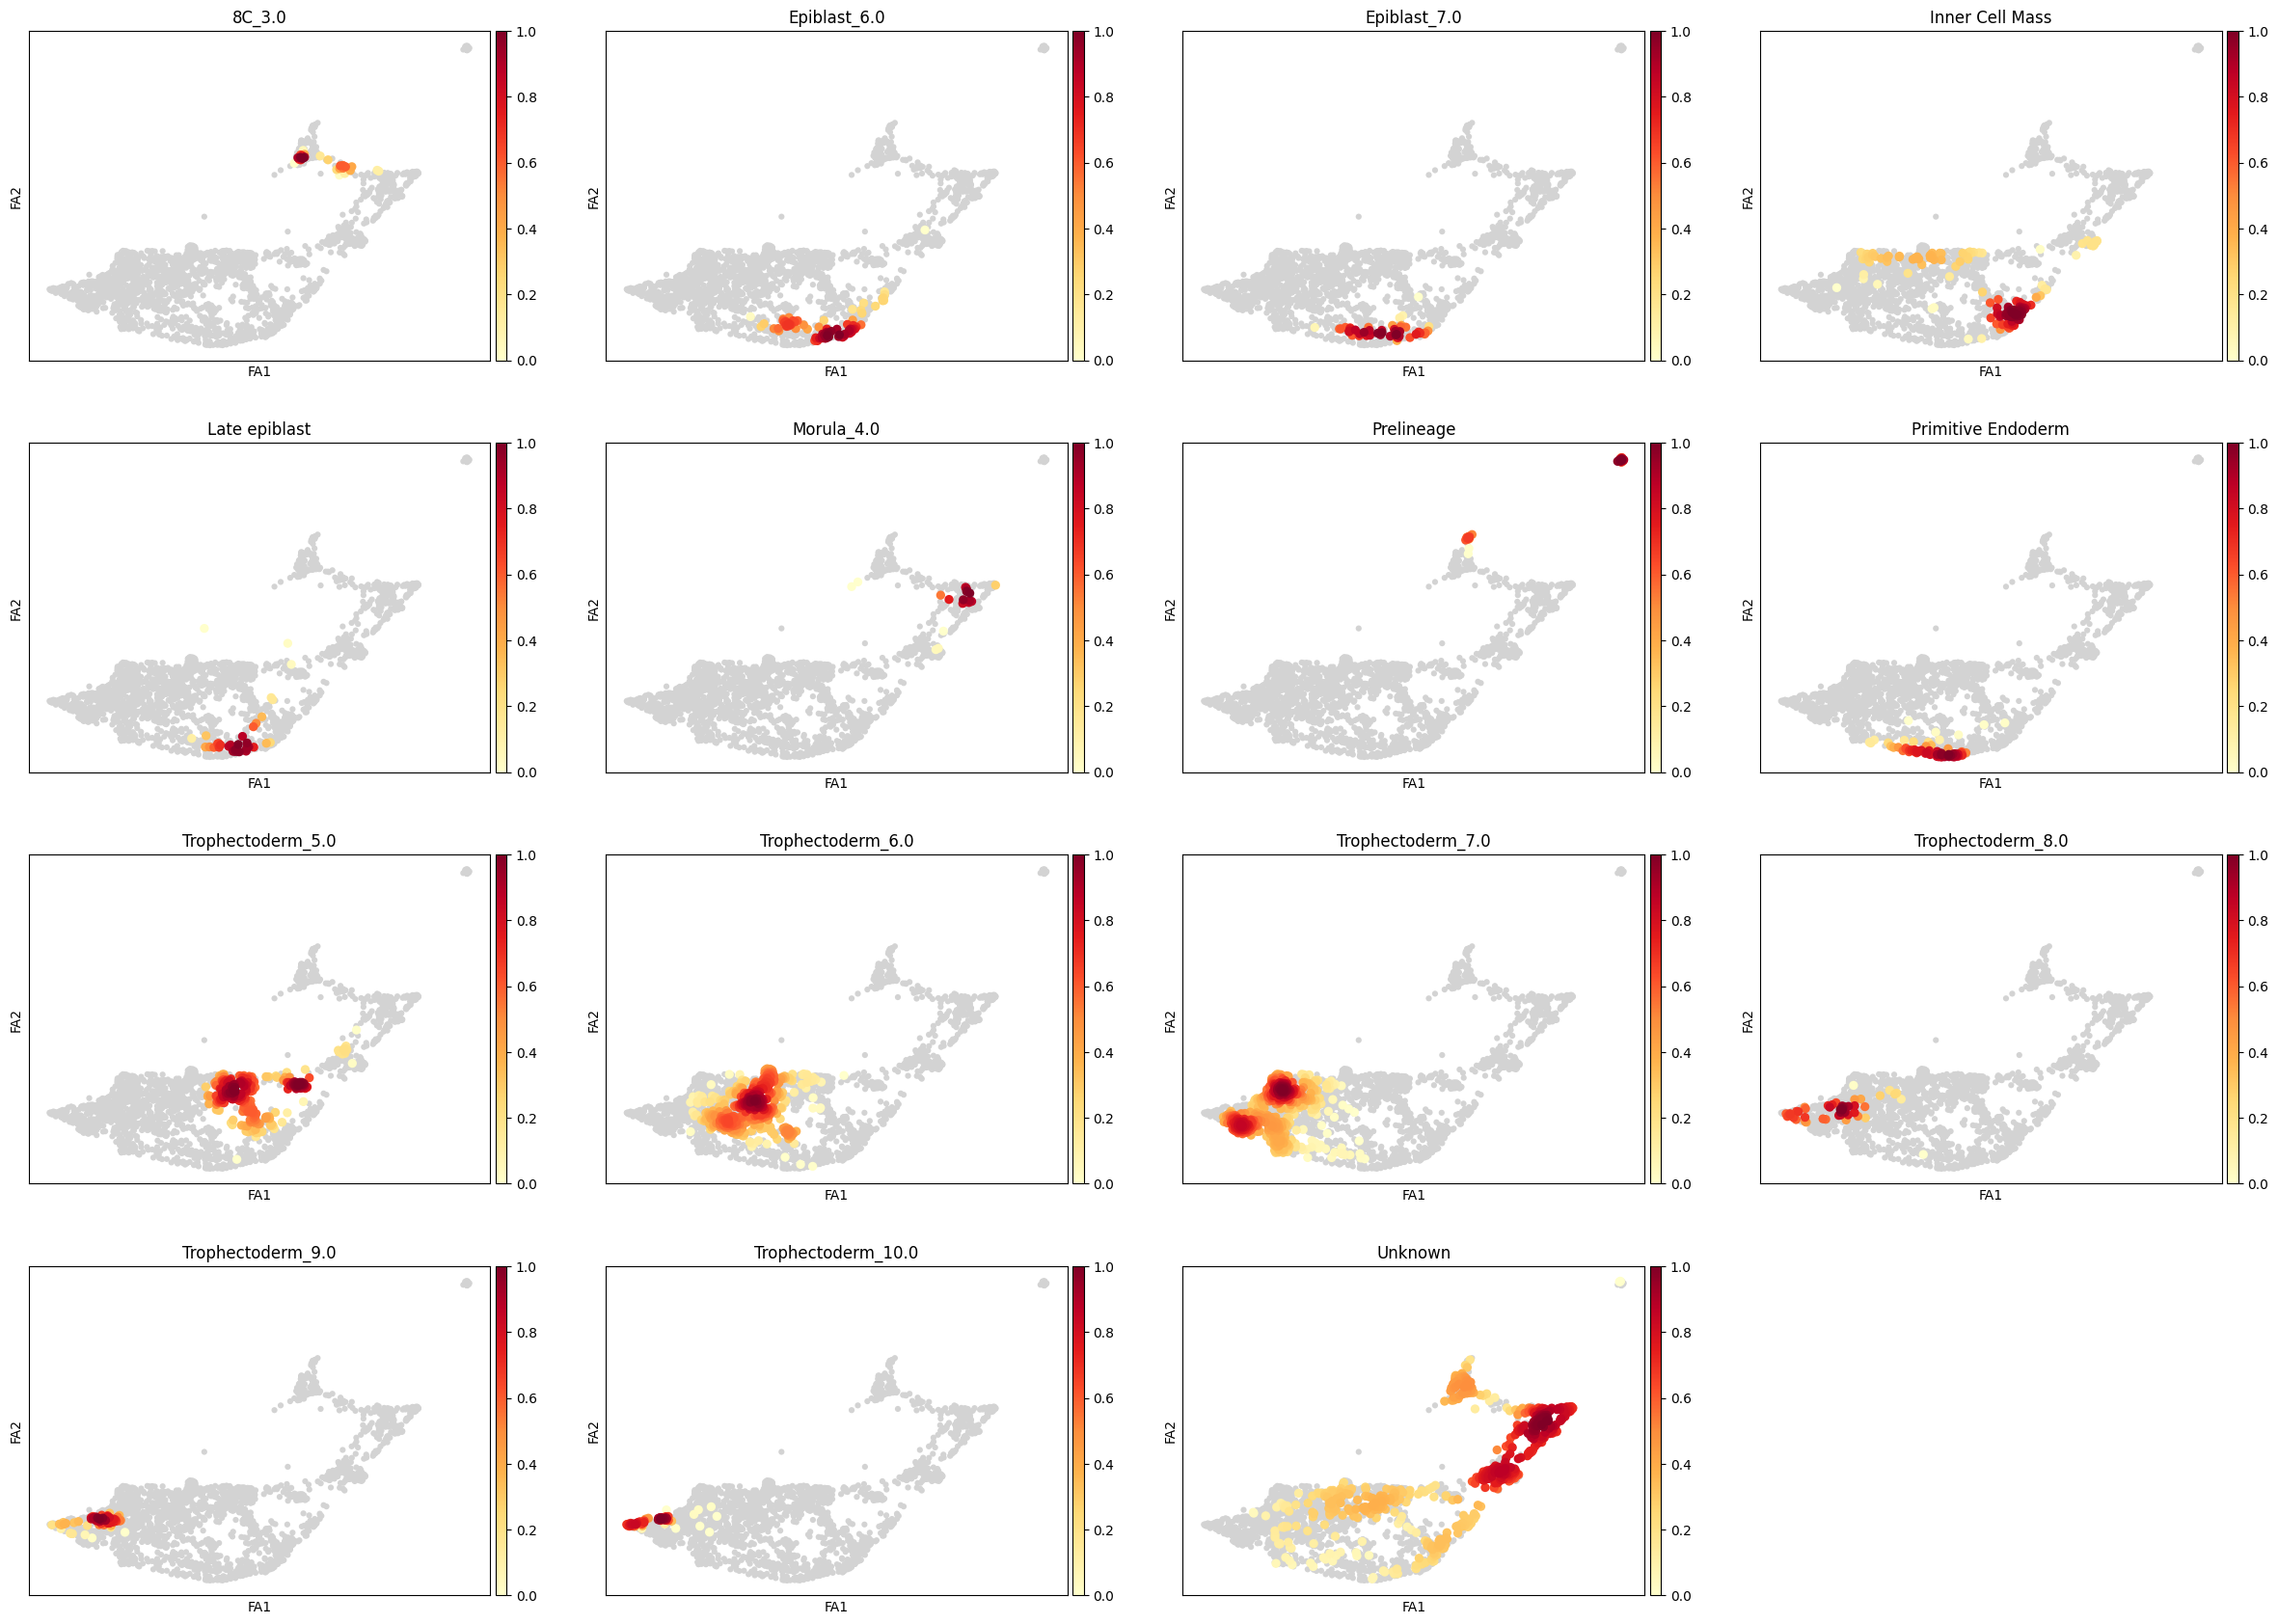

In [55]:
sc.tl.embedding_density(adata, basis='draw_graph_fa', groupby='ct')
sc.pl.embedding_density(adata, basis='draw_graph_fa', key='draw_graph_fa_density_ct')

In [56]:
# lineage_markers = pd.read_excel("../data/external/mouse_lineage_markers.xlsx", sheet_name="Sheet1").fillna('')
# lineage_markers

In [57]:
# for stage, genes in lineage_markers.to_dict('list').items():
#     common_genes = adata.var_names.intersection([str.lower(g) for g in genes if g != ''])
#     sc.pl.draw_graph(adata, color=['stage', *common_genes], title=[stage, *common_genes],
#                      groups=stage, legend_loc=None, frameon=False, ncols=len(common_genes) + 1)

## Save model

In [58]:
adata.write("../results/03_human.processed.h5ad")

## 4. OTHER

### 2. scGEN

`scGen` returns imputed counts only. In this case we are not able to run DEGs because we need to have normalized counts.
The `predict` function also won't work because we don't have any perturbation in the dataset.

In [ ]:
import scgen

In [ ]:
mscgen = scgen.SCGEN.load("../results/02_mouse_integration/scgen/")

In [ ]:
corrected_adata = mscgen.batch_removal()
corrected_adata

In [ ]:
sc.pp.neighbors(corrected_adata, use_rep='corrected_latent')
sc.tl.draw_graph(corrected_adata)

In [ ]:
sc.pl.draw_graph(corrected_adata, color=['ct', 'Stage'], wspace=0.4, frameon=False)

In [ ]:
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['batch', 'Stage'], wspace=0.4, frameon=False)

### 3. Integration stats

In [ ]:
from rich import print
from scib_metrics.benchmark import Benchmarker

In [ ]:
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="ct",
    embedding_obsm_keys=["X_pca", "X_scVI", "X_scANVI", "X_scgen"],
    n_jobs=-1,
)
bm.benchmark()

In [ ]:
bm.plot_results_table(min_max_scale=False)

In [ ]:
from pysankey import sankey


%run ../scripts/helpers.py

In [ ]:
sc.tl.dendrogram(adata, groupby="leiden", key_added="dendrogram_leiden")
sc.tl.dendrogram(adata, groupby="ct", key_added="dendrogram_ct")

In [ ]:
with plt.rc_context({"figure.figsize": [20, 20]}):
    sc.pl.correlation_matrix(adata, groupby="ct", show_correlation_numbers=True)

In [ ]:
_ = sc.pl.dendrogram(adata, groupby="ct", orientation='top')

### 3.1. Prediction

In [ ]:
def get_predictions(lvae: scvi.model.SCANVI, threshold: float = 0.85):
    df = pd.DataFrame(zip(predictions.idxmax(axis=1), predictions.max(axis=1)), columns=['predicted', 'score'])
    df['predicted_filt'] = 'Unknown'
    df.loc[df.score >= threshold, 'predicted_filt'] = df.loc[df.score >= threshold, 'predicted']
    df['uncertainty'] = np.maximum(1 - df.score, 0)

    return df

In [ ]:
lvae = scvi.model.SCANVI.load("../results/02-mouse/")
adata.obs[["predicted", "score", "predicted_filt", "uncertainty"]] = get_predictions(lvae).values

In [ ]:
sc.pl.draw_graph(adata, color=['ct', 'predicted', 'uncertainty'], frameon=False, ncols=3)

In [ ]:
df = adata.obs.groupby(["ct", "predicted"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
_ = plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Observed")

In [ ]:
# Stats
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(adata.obs["ct"].values, adata.obs["predicted"].values)